# Making The model

This was done in a colab notebook for gpu performance

## Loading Data

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.utils import image_dataset_from_directory

In [3]:
import zipfile

In [4]:
filePath = "/content/drive/MyDrive/suv vs super carspartitioned data.zip"

with zipfile.ZipFile(filePath, 'r') as f:
  f.extractall('/content/')

In [6]:
trainData = image_dataset_from_directory('/content/data/train')
testData = image_dataset_from_directory('/content/data/test')
validData = image_dataset_from_directory('/content/data/valid')

Found 7887 files belonging to 2 classes.
Found 1051 files belonging to 2 classes.
Found 1578 files belonging to 2 classes.


In [8]:
print(f"[BATCHES] Train: {len(trainData)}, Test: {len(testData)}, Valid: {len(validData)}")

[BATCHES] Train: 247, Test: 33, Valid: 50


## Creating Model

In [9]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [24]:
model = Sequential([
    Conv2D(16, 3, 1, input_shape=(256, 256, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.2),

    Conv2D(32, 3, 1, activation='relu'),
    MaxPool2D(),
    Dropout(0.2),

    Conv2D(16, 3, 1, activation='relu'),
    MaxPool2D(),
    Dropout(0.2),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.35),

    Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 32)       

In [18]:
from keras.metrics import Precision
from keras.losses import BinaryCrossentropy

In [17]:
model.compile??

In [26]:
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy', Precision()])

In [20]:
model.fit??

In [27]:
hist = model.fit(trainData, epochs=25, validation_data=validData)

Epoch 1/25
247/247 [==============================] - 22s 75ms/step - loss: 5.7779 - accuracy: 0.5365 - precision_1: 0.5344 - val_loss: 0.6799 - val_accuracy: 0.5634 - val_precision_1: 0.6396
Epoch 2/25
247/247 [==============================] - 18s 72ms/step - loss: 0.6483 - accuracy: 0.6043 - precision_1: 0.6130 - val_loss: 0.6459 - val_accuracy: 0.5970 - val_precision_1: 0.7310
Epoch 3/25
247/247 [==============================] - 20s 81ms/step - loss: 0.5952 - accuracy: 0.6620 - precision_1: 0.6773 - val_loss: 0.6066 - val_accuracy: 0.6572 - val_precision_1: 0.7148
Epoch 4/25
247/247 [==============================] - 18s 70ms/step - loss: 0.5069 - accuracy: 0.7339 - precision_1: 0.7464 - val_loss: 0.5171 - val_accuracy: 0.7212 - val_precision_1: 0.7515
Epoch 5/25
247/247 [==============================] - 17s 67ms/step - loss: 0.4294 - accuracy: 0.7903 - precision_1: 0.7972 - val_loss: 0.4477 - val_accuracy: 0.7877 - val_precision_1: 0.8392
Epoch 6/25
247/247 [====================

In [28]:
model.save('model.h5')

## Checking traiining data

In [31]:
import matplotlib.pyplot as plt

In [37]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'val_loss', 'val_accuracy', 'val_precision_1'])

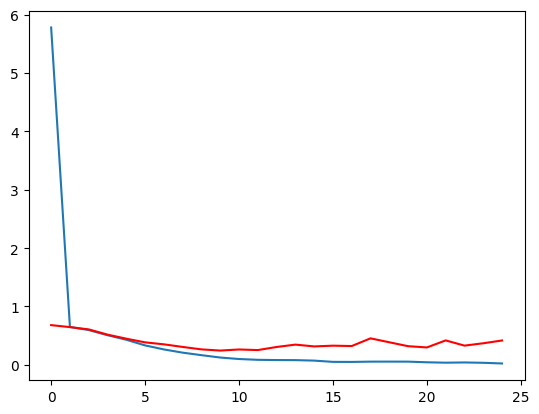

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], color='red')

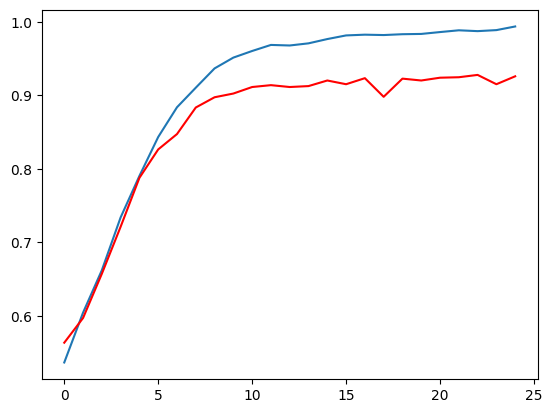

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'], color='red')

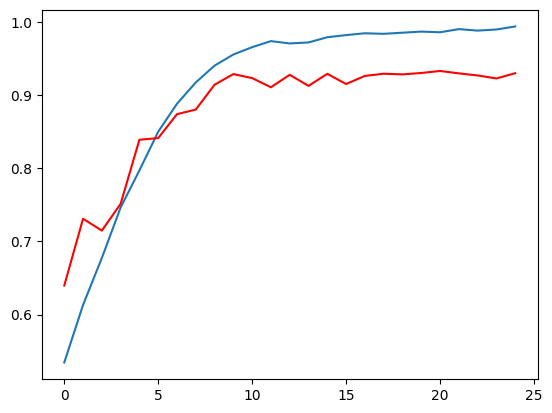

In [38]:
plt.plot(hist.history['precision_1'])
plt.plot(hist.history['val_precision_1'], color='red')